<h1><b>Importing the Necessary Libraries </b></h1>

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import tree 
from itertools import product

<h1><b>Importing the Dataset and Doing some Exploratory Analysis</b></h1>

In [6]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [9]:
data.shape

(150, 6)

In [10]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<h1><b>Preparing the training and test sets</b></h1>

In [11]:
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = data[feature_names]
Y = data['Species']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1) 

<h1><b>Creating, Training and Testing the Model</b></h1>

In [19]:
max_depth = [3, 5, 7, 8, 9, 10, 25, 50, 100, 250, 500]

min_sample = [1,2,3,4,5,6,7,8,9,10]

combinations = list(product(max_depth, min_sample))

def get_acc(c, X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = c[0],min_samples_leaf = c[1])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)

arr2 = []
for c in combinations :
    acc = get_acc(c,X_train, X_test, y_train, y_test)
    print("the accuracy for " + str(c[0]) + " ," + str(c[1]) + " is : " + str(acc))
    arr2.append([c,acc])


best_tree_size = max(arr2, key=lambda x: x[1])[0]
print("------------------------------------------")
print("| the best tree size is : " + str(best_tree_size) + " |")
print("------------------------------------------")

the accuracy for 3 ,1 is : 0.9666666666666667
the accuracy for 3 ,2 is : 0.9666666666666667
the accuracy for 3 ,3 is : 0.9666666666666667
the accuracy for 3 ,4 is : 0.9666666666666667
the accuracy for 3 ,5 is : 0.9666666666666667
the accuracy for 3 ,6 is : 0.9666666666666667
the accuracy for 3 ,7 is : 0.9666666666666667
the accuracy for 3 ,8 is : 0.9666666666666667
the accuracy for 3 ,9 is : 0.9666666666666667
the accuracy for 3 ,10 is : 0.9666666666666667
the accuracy for 5 ,1 is : 0.9666666666666667
the accuracy for 5 ,2 is : 0.9666666666666667
the accuracy for 5 ,3 is : 0.9666666666666667
the accuracy for 5 ,4 is : 0.9666666666666667
the accuracy for 5 ,5 is : 0.9666666666666667
the accuracy for 5 ,6 is : 0.9666666666666667
the accuracy for 5 ,7 is : 0.9666666666666667
the accuracy for 5 ,8 is : 0.9666666666666667
the accuracy for 5 ,9 is : 0.9666666666666667
the accuracy for 5 ,10 is : 0.9666666666666667
the accuracy for 7 ,1 is : 0.9666666666666667
the accuracy for 7 ,2 is : 0.966

<h1><b>Training the Model using Cross Validation</b></h1>

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


def get_score(c):
   
    my_pipeline = Pipeline(steps=[
    ('model', DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = c[0],min_samples_leaf = c[1]))
    ])
    scores = cross_val_score(my_pipeline, X, Y,
                              cv=5,
                              scoring='accuracy')
    
    return scores.mean()
    
arr = []

for c in combinations :
    acc = get_score(c)
    print("the accuracy for " + str(c[0]) + " ," + str(c[1]) + " is : " + str(acc))
    arr.append([c,acc])


best_tree_size = max(arr, key=lambda x: x[1])[0]
print("------------------------------------------")
print("| the best tree size is : " + str(best_tree_size) + " |")
print("------------------------------------------")

the accuracy for 3 ,1 is : 0.96
the accuracy for 3 ,2 is : 0.9466666666666667
the accuracy for 3 ,3 is : 0.9466666666666667
the accuracy for 3 ,4 is : 0.9466666666666667
the accuracy for 3 ,5 is : 0.9400000000000001
the accuracy for 3 ,6 is : 0.9400000000000001
the accuracy for 3 ,7 is : 0.9400000000000001
the accuracy for 3 ,8 is : 0.9400000000000001
the accuracy for 3 ,9 is : 0.9333333333333332
the accuracy for 3 ,10 is : 0.9333333333333332
the accuracy for 5 ,1 is : 0.9533333333333334
the accuracy for 5 ,2 is : 0.9466666666666667
the accuracy for 5 ,3 is : 0.9466666666666667
the accuracy for 5 ,4 is : 0.9466666666666667
the accuracy for 5 ,5 is : 0.9400000000000001
the accuracy for 5 ,6 is : 0.9400000000000001
the accuracy for 5 ,7 is : 0.9400000000000001
the accuracy for 5 ,8 is : 0.9400000000000001
the accuracy for 5 ,9 is : 0.9333333333333332
the accuracy for 5 ,10 is : 0.9333333333333332
the accuracy for 7 ,1 is : 0.9533333333333334
the accuracy for 7 ,2 is : 0.9466666666666667


<h2>Some Explanations and Analysis</h2>

<p><b>we can see that we got better results without using cross validation then with using it which might be explained by one of the following reasons </b></p>

<h3>Data Splitting Luck:</h3>
<p><b>The data split into training and testing sets might be particularly favorable for the model in a single random split. This could lead to an overestimation of the model's performance because it performs well on that specific random split.</b></p>

<h3>Small Datasets:</h3>
<p><b>In small datasets, the randomness in data splitting can have a significant impact. With limited data, the model might learn peculiarities of the training set that do not generalize well.</b></p>

<h3>Data Leakage:</h3>
<p><b>There might be unintentional data leakage, where information from the test set influences the training process. If this happens, the model might appear to perform well on the test set, but its true generalization performance is overestimated.</b></p>

<h3>Overfitting:</h3>
<p><b>The model might be overfitting to the training set, capturing noise or outliers, and not generalizing well to new, unseen data.</b></p>

<h3>Hyperparameter Tuning Without Cross-Validation:</h3>
<p><b>If hyperparameters are tuned without cross-validation, there is a risk of overfitting the model to the specific training set, resulting in poor performance on new data.</b></p>


<p><b>["source : ChatGpt"]</b></p>

<h1><b>Visualizing the Tree</b></h1>

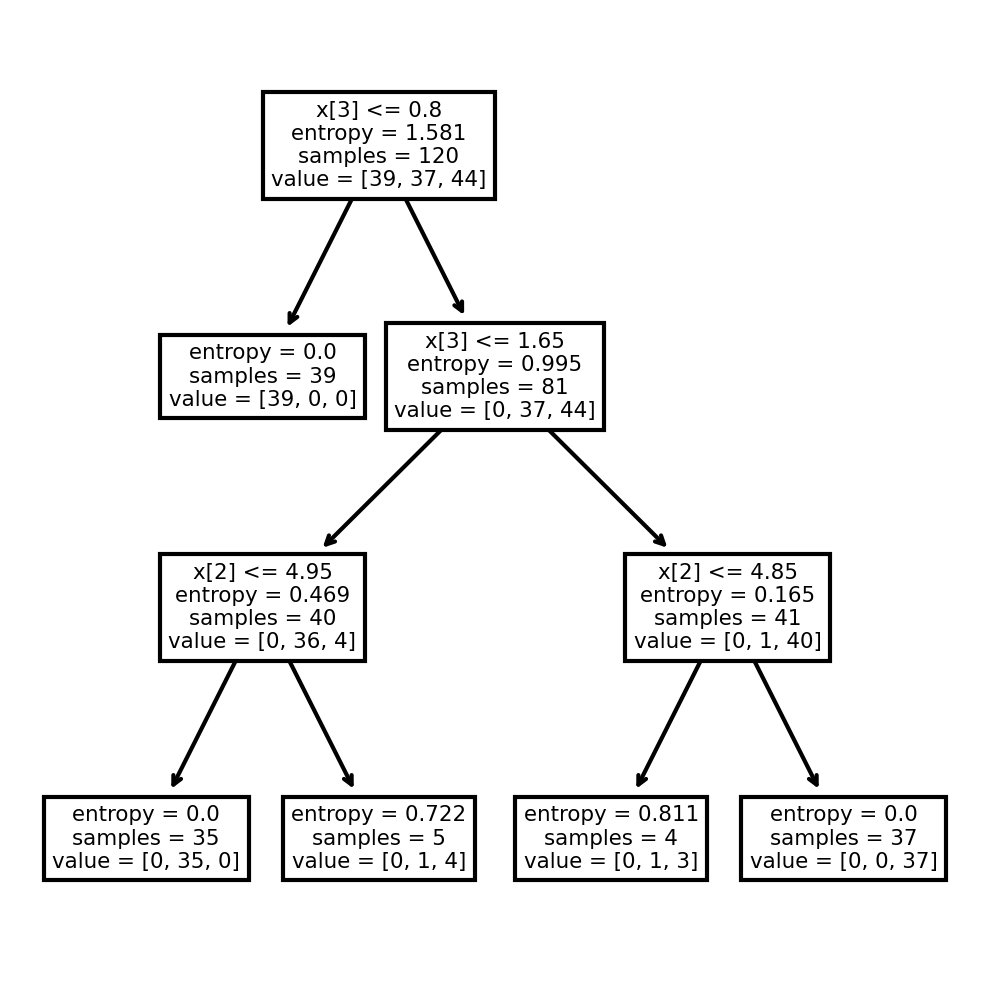

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 3,min_samples_leaf = 1)
model.fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(model);
fig.savefig('plottreedefault.png')

In [17]:
fn = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

cn = ['Virginica','Setosa','Versicolor']

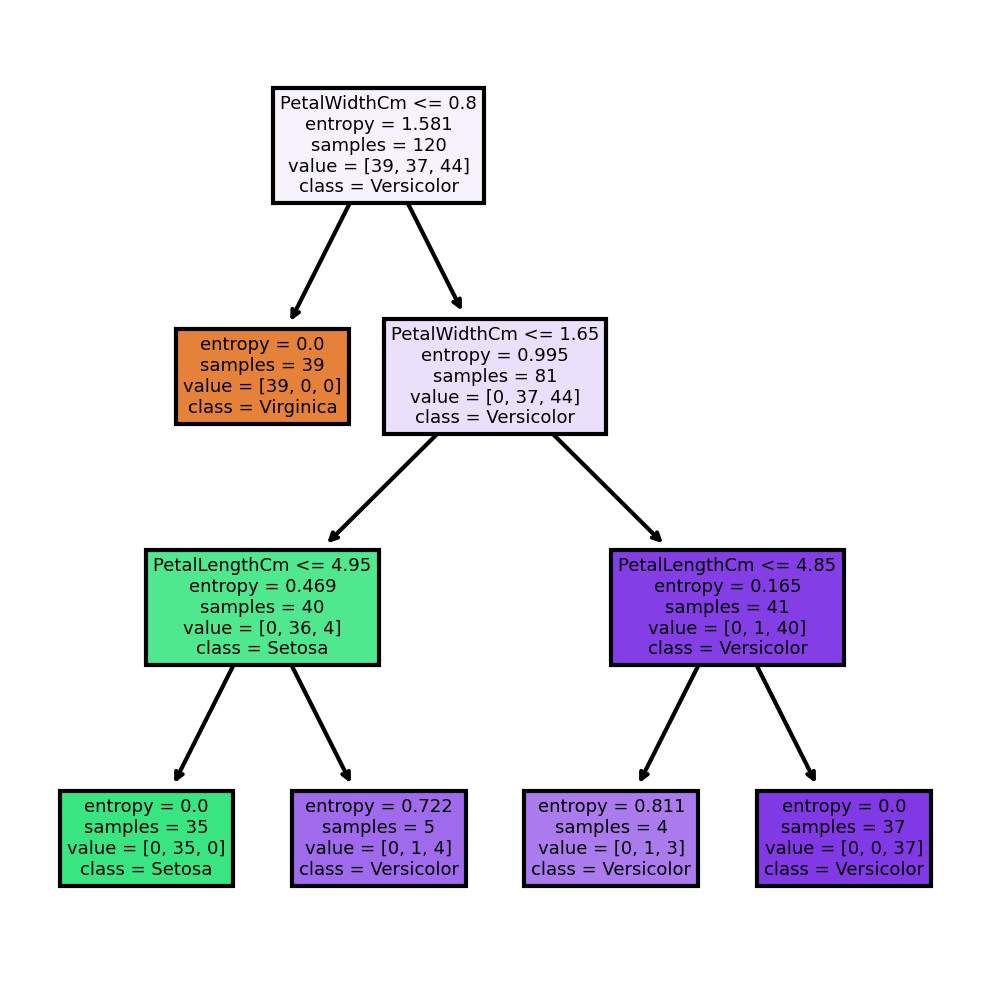

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('plottreefncn.png')